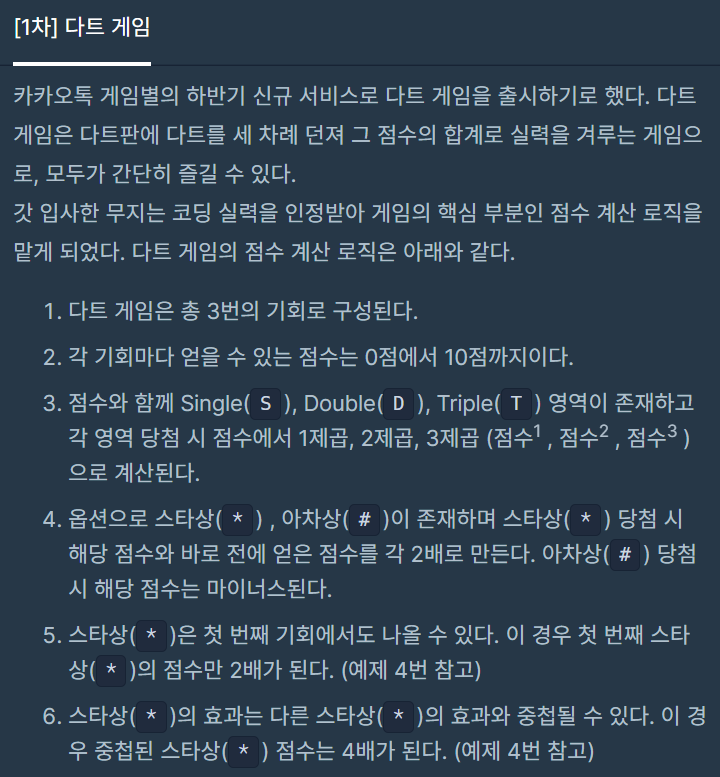

In [34]:
dartResult = '1S2D*3T'

# 1. 각 점수에 대한 계산

In [35]:
bonus = {'S': 1,'D':2,'T':3}
option = {'':1,'*':2, '#':3}

# 2. 출력결과로 들어온 문자열을 3세트로 나누기

In [36]:
import re

p = re.compile('(\d+)([SDT])([*#]?)')
# (숫자로 된 문자열이 하나 이상 있는 그룹)
# (문자열중에 S/D/T 중 하나가 있는 그룹)
# (문자열 */#이 있을 수 있고 없을수도 있다.)

dart = p.findall(dartResult)
dart

[('1', 'S', ''), ('2', 'D', '*'), ('3', 'T', '')]

# 3. 정규식으로 나온 3개의 튜플을 점수식에 계산하기

In [13]:
for i in range(len(dart)):
    if dart[i][2] == '*':
        dart[i-1]*=2
dart

[('1', 'S', '', '1', 'S', ''), ('2', 'D', '*'), ('3', 'T', '')]

In [32]:
for i in range(len(dart)):
    if dart[i][2] == '*' and i >0:
        dart[i-1]*=2
    dart[i] = int(dart[i][0]) **bonus[dart[i][1]] * option[dart[i][2]]
dart

[2, 8, 27]

# 4. 위에 나온 결과를 모두 더함

In [37]:
for i in range(len(dart)):
    if dart[i][2] == '*' and i >0:
        dart[i-1]*=2
    dart[i] = int(dart[i][0]) **bonus[dart[i][1]] * option[dart[i][2]]
sum(dart)

37

# 5. 함수화

In [38]:
def solution(dartResult):
    import re
    
    bonus = {'S':1, 'D':2, 'T':3}
    options = {'':1, '*':2, '#':-1}
    
    p = re.compile('(\d+)([SDT])([*#]?)')
    dart = p.findall(dartResult)
    
    for i in range(len(dart)):
        if dart[i][2] == '*' and i > 0:
            dart[i-1] *= 2
        dart[i] = int(dart[i][0]) ** bonus[dart[i][1]] * options[dart[i][2]]
        
    answer = sum(dart)
    return answer